1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_name = "regression_generated.csv"
data = pd.read_csv(file_name)
x = data['features_1']
y = data['features_2']
z = data['faetures_3']
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,36))
ax1.scatter(x=x, y=y, marker='o', c='c', edgecolor='b')
ax2.scatter(x=x, y=z, marker='o', c='r', edgecolor='k')
ax3.scatter(x=y, y=z, marker='o', c='g', edgecolor='k')
ax1.set_xlabel("features_1")
ax1.set_ylabel("features_2")
ax2.set_xlabel("features_1")
ax2.set_ylabel("features_3")
ax3.set_xlabel("features_2")
ax3.set_ylabel("featues_3")


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,200)

x1 = gaussian(1,0.5)
y1 = gaussian(1,0.5)
plt.scatter(x1,y1)

x2 = gaussian(0,0.4)
y2 = gaussian(0,0.4)
plt.scatter(x2,y2)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
import pandas as pd   
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data=np.load("residuals_261.pkl",allow_pickle=True).item()
data=pd.DataFrame(data)


print(data)
print(data.info())

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


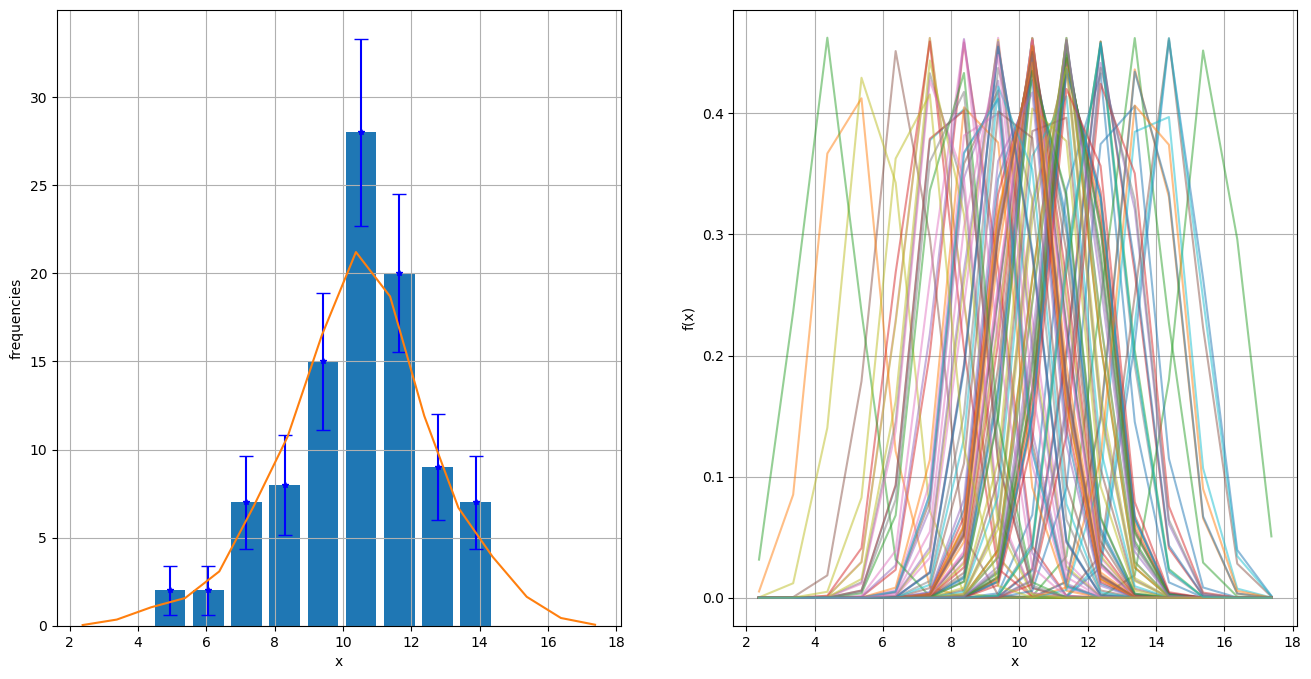

In [2]:
import numpy as np
from scipy import integrate
from scipy.stats import norm
import matplotlib.pyplot as plt
#normally distributed numpy array, x, of len(N) (with N=O(100))
mu, sigma = 10, 2
N=100
x = np.random.normal(mu, sigma, N)
#Fill an histogram
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
Nbins=10
bins=np.arange(x.min(), x.max(), (x.max()-x.min())/Nbins)
freq, bins, patches = ax1.hist(x=x, bins=bins,alpha=1, histtype='bar', rwidth=0.8)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('frequencies')
#error part of the question
bincenters = (bins[1:] + bins[:-1])/2
ax1.errorbar(x=bincenters, y=freq, yerr=np.sqrt(freq), fmt='x', c='b', marker='*', markersize=4, capsize=5)
#create a gaussian with the mean corresponding to the element 
std_def = 1.06 * x.std() * (x.size ** -0.2)
xrange = np.arange(x.min()-sigma, x.max()+sigma)
gaussians = []
for i, dat in enumerate(x):
    gaussians.append( norm(loc=dat, scale=std_def).pdf(xrange) )
    ax2.plot(xrange, gaussians[i], alpha=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid()
#Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral 
#of the original histogram.
area=integrate.trapz(freq, dx=bins[1]-bins[0])
kde=np.array(gaussians).sum(axis=0)
ax1.plot(xrange,kde/sum(kde)*area)
plt.show()